In [132]:
# Get Data to play with
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

In [133]:
def plot_ts(ts: pd.Series, title: str = None) -> None:
    """plots a given timeseries and displays an optional title"""

    plt.figure(figsize=(20, 5))
    ax = plt.subplot(111)
    plt.plot(ts)
    plt.title(title or '', loc='right', fontsize=15)
    plt.grid(alpha=0.5, linestyle='dashed')
    plt.show()

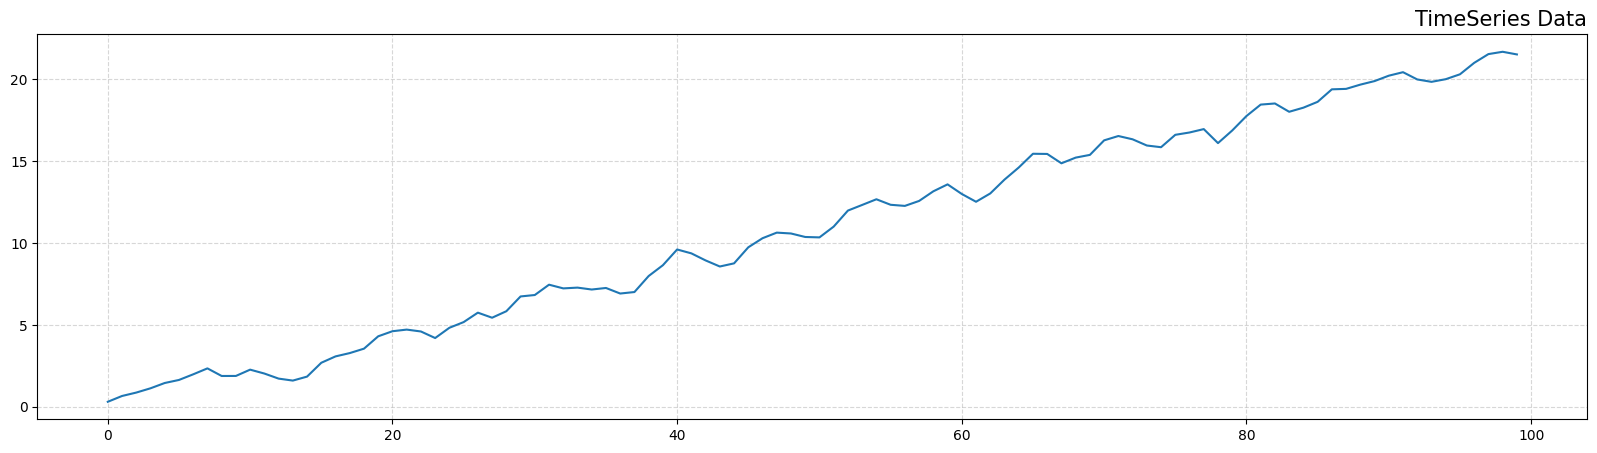

In [134]:
# Generate Random Time Series Data
np.random.seed(42)
n = 100
mean = 0
std = 1
trend = 0.22
window_size = 10

time_series = np.random.normal(mean, std, n)

time_axis = np.arange(n)
trend = trend * time_axis
time_series = time_series + trend

smoothed_time_series = savgol_filter(time_series, window_size, 5)
plot_ts(smoothed_time_series, title='TimeSeries Data')

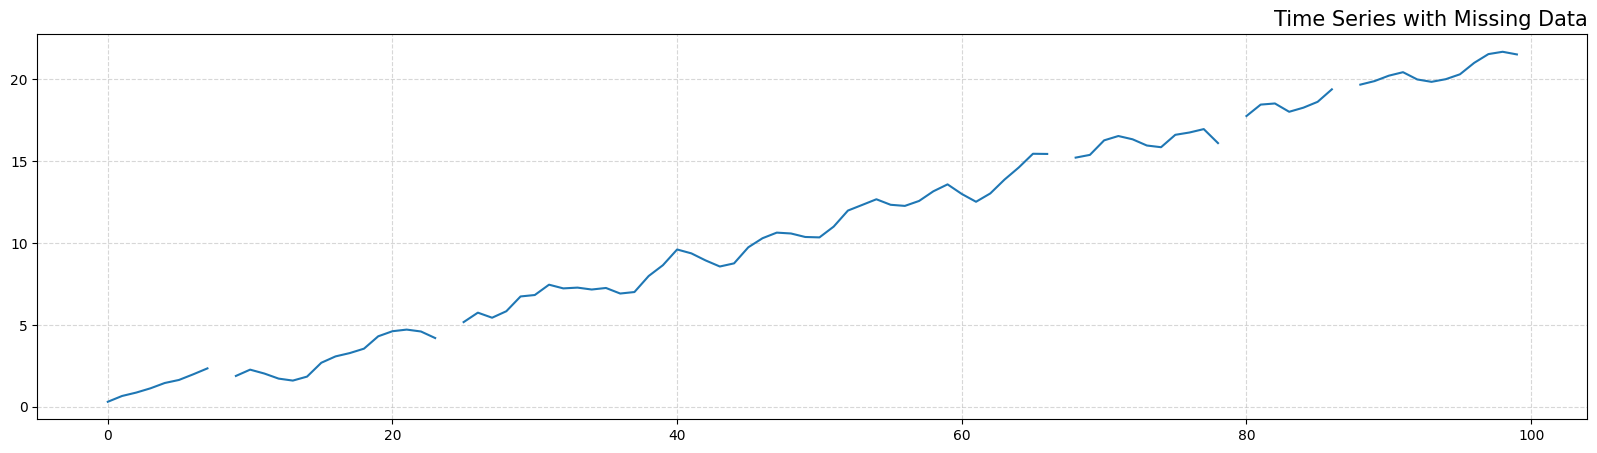

In [135]:
# Remove Random Values for interpolation
np.random.seed(100)
smoothed_time_series = pd.Series(smoothed_time_series)
missing_time_series = smoothed_time_series.copy(deep=True)
missing_index = np.random.choice(missing_time_series.index, 5)
missing_time_series[missing_index] = np.nan

plot_ts(missing_time_series, title="Time Series with Missing Data")

In [136]:
# Tools
def show_imputation(imputed: pd.Series,
                    title: str,
                    figsize: tuple = None,
                    ts_original: pd.Series = smoothed_time_series,
                    ts_missing: pd.Series = missing_time_series,
                    ) -> None:
    """plots the imputation and compares with original"""

    figsize = figsize or (20, 5)
    plt.figure(figsize=figsize)
    ax = plt.subplot(111)
    smoothed_time_series.plot(
        ax=ax,
        color='green',
        linestyle='dashed',
        label='missing')
    imputed.plot(
        ax=ax,
        color='red',
        linestyle='dotted',
        label='imputed')
    missing_time_series.plot(
        ax=ax,
        color='blue',
        label='time series')
    plt.title(title, loc='right', fontsize=15)
    plt.grid(alpha=0.5, linestyle='dashed')
    plt.legend()
    plt.show()

def get_rmse(imputed: pd.Series,
             smoothed_time_series: pd.Series = smoothed_time_series,
             missing_time_series: pd.Series = missing_time_series,
             ) -> None:
    """get RMSE for timeseries imputation"""

    mse = mean_squared_error(
        y_true=smoothed_time_series[missing_index],
        y_pred=imputed[missing_index]
    )
    rmse = np.sqrt(mse)
    return rmse

### Mean Imputation Strategy

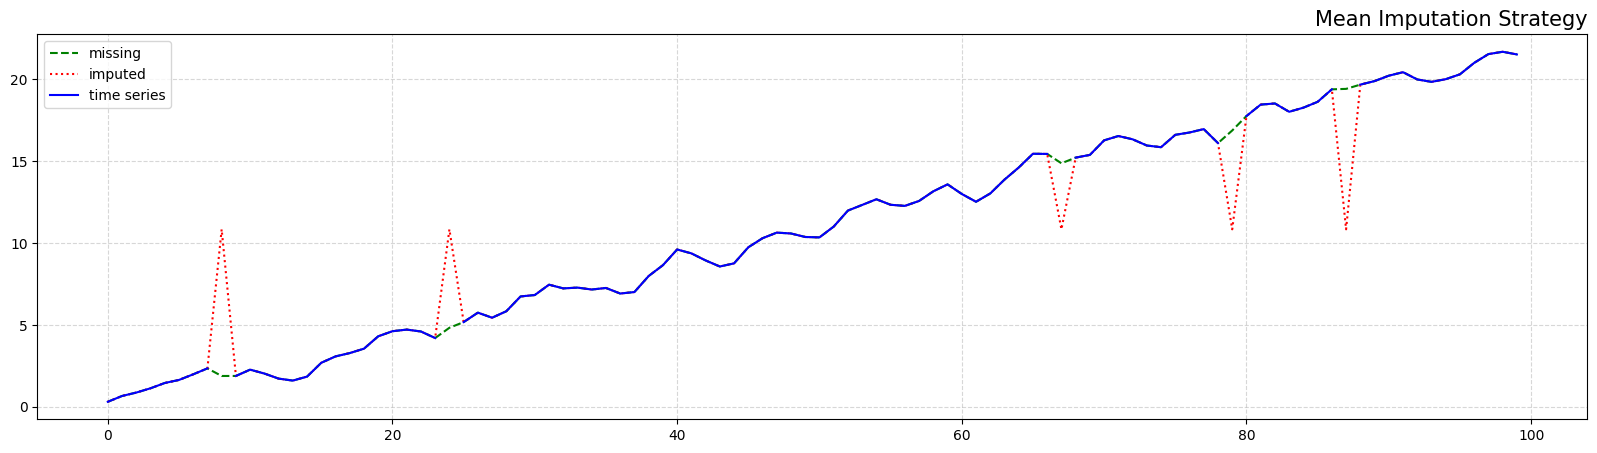

6.962954029830893


In [143]:
mean_imputed = missing_time_series.fillna(missing_time_series.mean())
show_imputation(mean_imputed, title = 'Mean Imputation Strategy')
mean_imputed_rmse = get_rmse(mean_imputed)
print(mean_imputed_rmse)

### Median Imputation Strategy

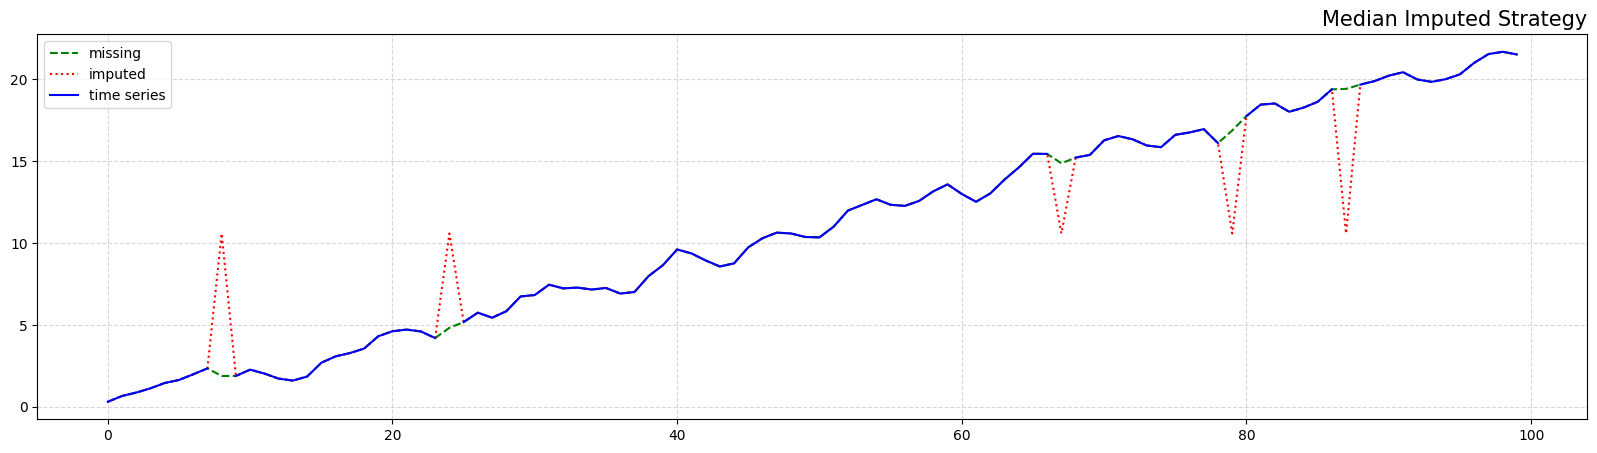

6.9943701412565815


In [144]:
median_imputed = missing_time_series.fillna(missing_time_series.median())
show_imputation(median_imputed, title="Median Imputed Strategy")
median_imputed_rmse = get_rmse(median_imputed)
print(median_imputed_rmse)

### Last Observation Carried Forward / Forward Fill 

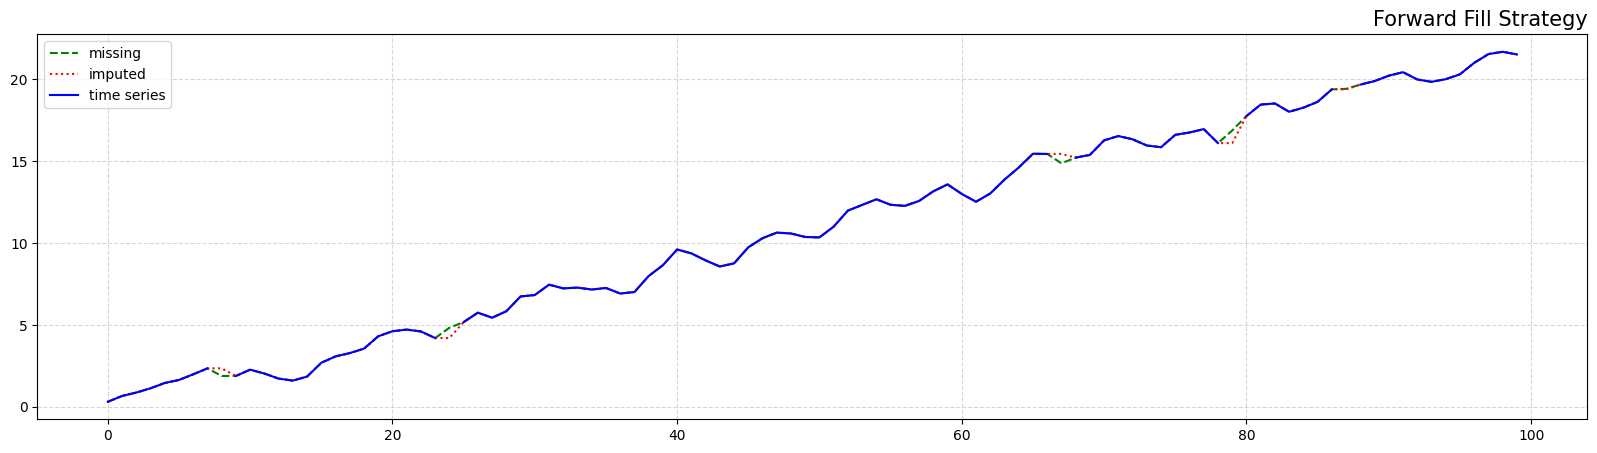

0.5527671943953325


In [145]:
ffill_imputed = missing_time_series.fillna(method='ffill')
show_imputation(ffill_imputed, title="Forward Fill Strategy")
ffill_imputed_rmse = get_rmse(ffill_imputed)
print(ffill_imputed_rmse)

### Next Observation Carried Forward / Backward Fill

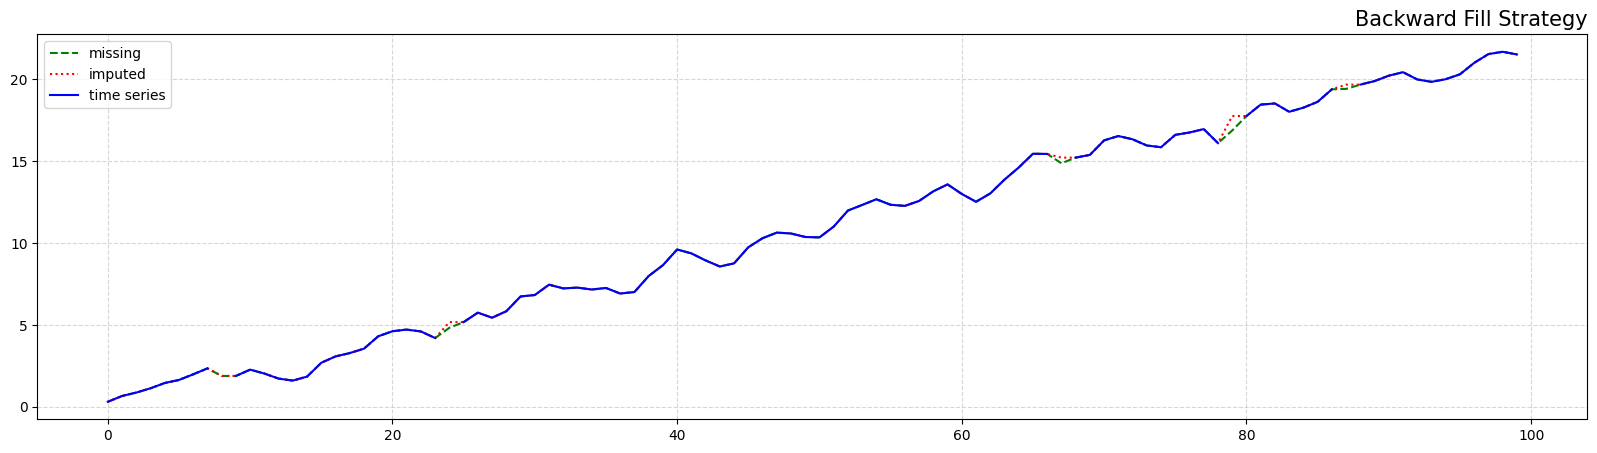

0.46588130692681096


In [146]:
bfill_imputed = missing_time_series.fillna(method='bfill')
show_imputation(bfill_imputed, title="Backward Fill Strategy")
bfill_imputed_rmse = get_rmse(bfill_imputed)
print(bfill_imputed_rmse)

### Linear Interpolation

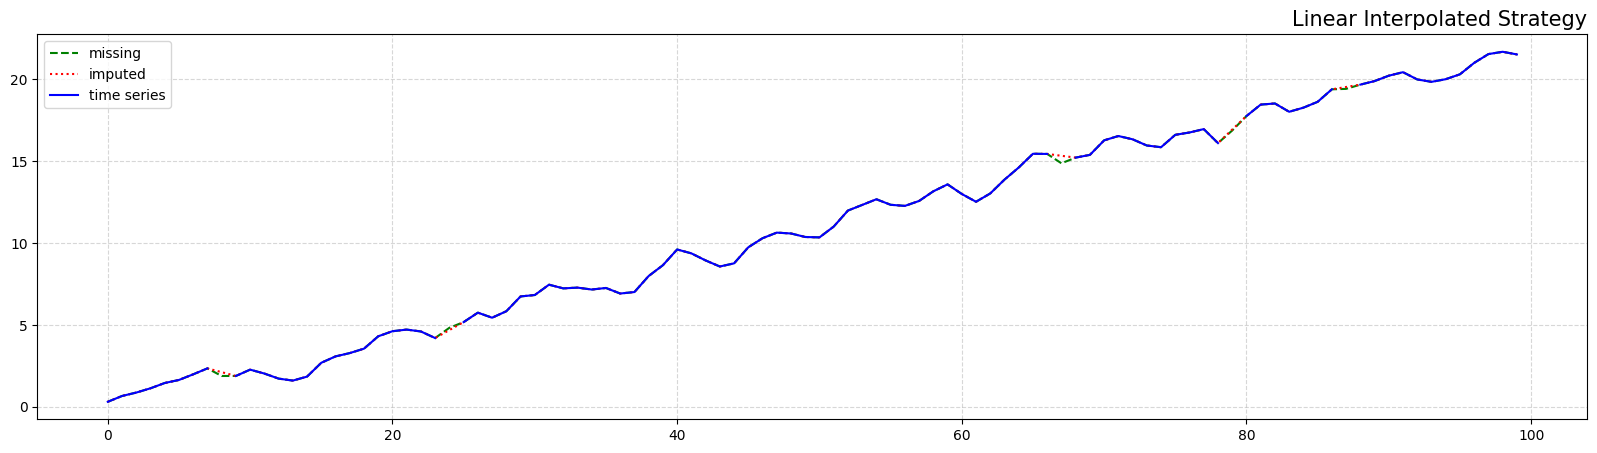

0.2453074468044795


In [147]:
linear_imputed = missing_time_series.interpolate(method='linear')
show_imputation(linear_imputed, title="Linear Interpolated Strategy")
linear_rmse = get_rmse(linear_imputed)
print(linear_rmse)

### Spline Interpolation

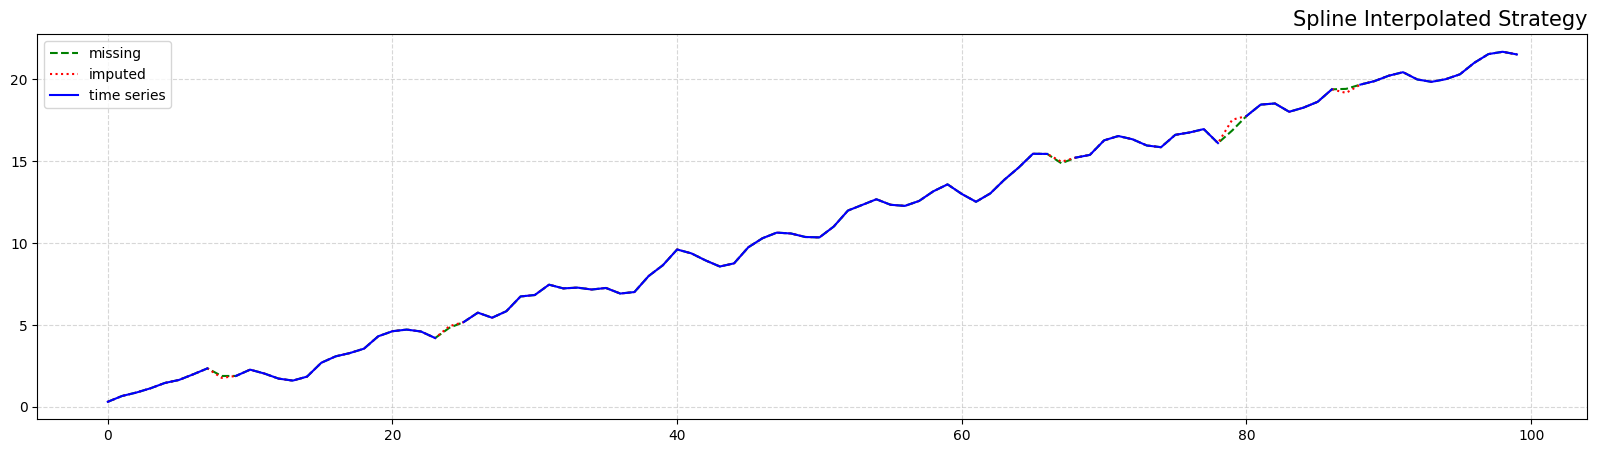

0.32370215016318976


In [158]:
spline_imputed = missing_time_series.interpolate(method='spline', order=4)
show_imputation(spline_imputed, title="Spline Interpolated Strategy")
spline_rmse = get_rmse(spline_imputed)
print(spline_rmse)

### Polynomial Interpolation

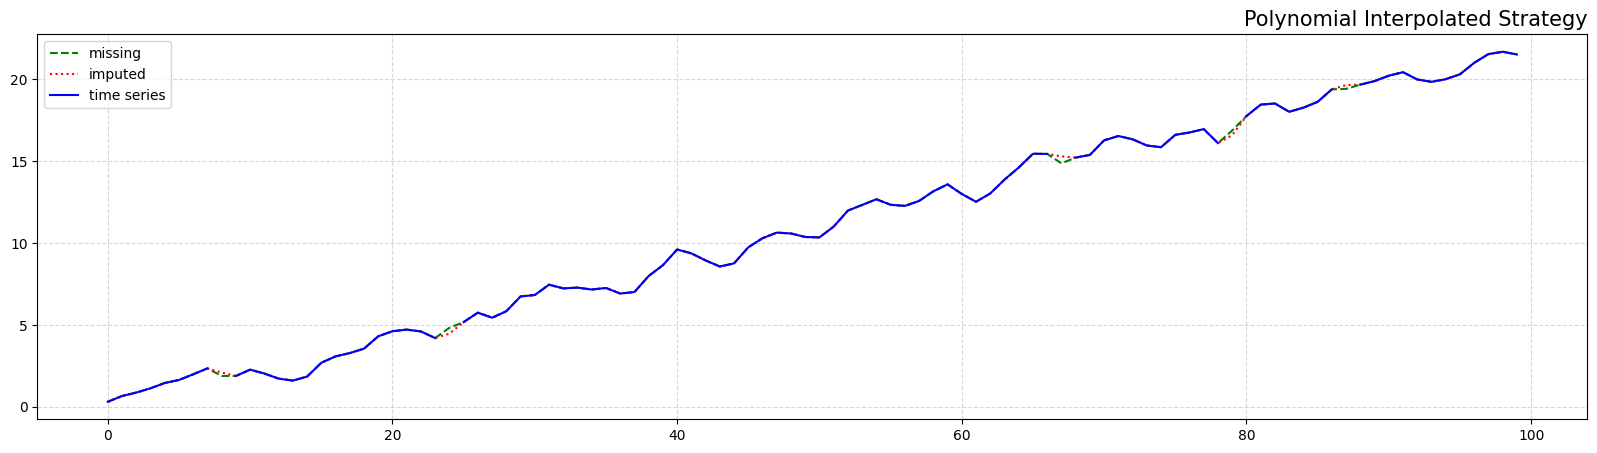

0.3121033869649203


In [162]:
polynomial_imputed = missing_time_series.interpolate(method='polynomial', order=2)
show_imputation(polynomial_imputed, title="Polynomial Interpolated Strategy")
polynomial_rmse = get_rmse(polynomial_imputed)
print(polynomial_rmse)

### Cubic Interpolation

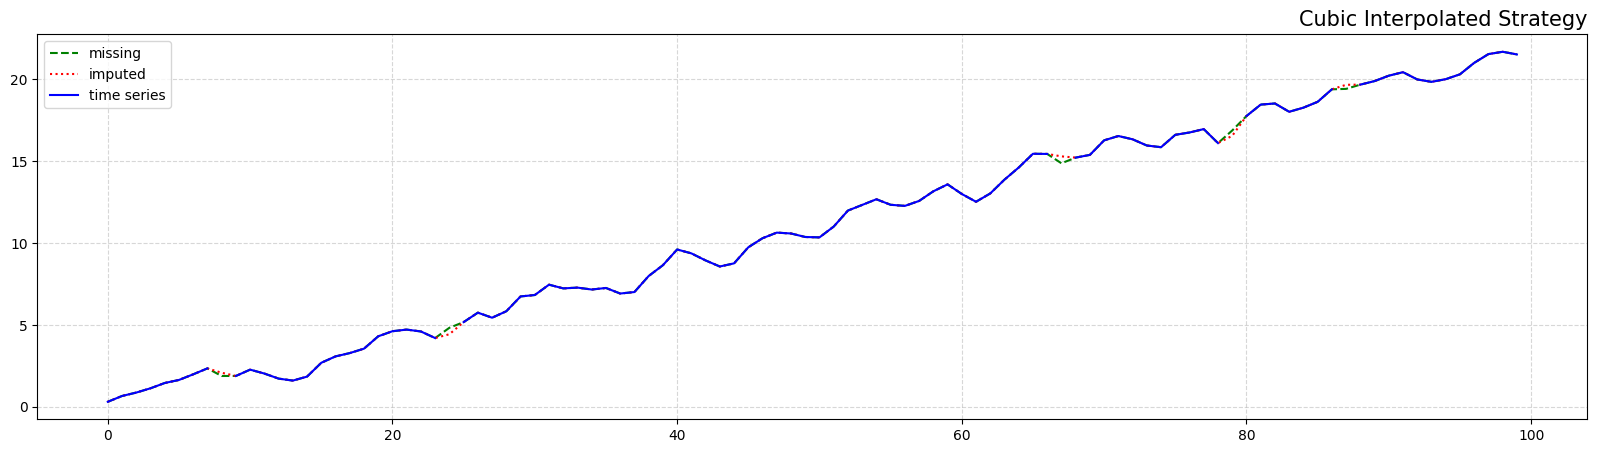

0.32915866401888677


In [163]:
cubic_imputed = missing_time_series.interpolate(method='cubic')
show_imputation(cubic_imputed, title="Cubic Interpolated Strategy")
cubic_rmse = get_rmse(cubic_imputed)
print(cubic_rmse)

In [168]:
# results

results = {
    "Mean RMSE": mean_imputed_rmse,
    "Median RMSE": median_imputed_rmse,
    "Forward Fill RMSE": ffill_imputed_rmse,
    "Backward Fill RMSE": bfill_imputed_rmse,
    "Linear RMSE": linear_rmse,
    "Spline RMSE": spline_rmse,
    "Polynomial RMSE": polynomial_rmse,
    "Cubic RMSE": cubic_rmse
}

results_df = pd.DataFrame(results, index=[0])
results_df = results_df.T.rename(columns={0:'RMSE'}).sort_values('RMSE', ascending=True)
results_df

,RMSE
Linear RMSE,0.245307
Polynomial RMSE,0.312103
Spline RMSE,0.323702
Cubic RMSE,0.329159
Backward Fill RMSE,0.465881
Forward Fill RMSE,0.552767
Mean RMSE,6.962954
Median RMSE,6.994370


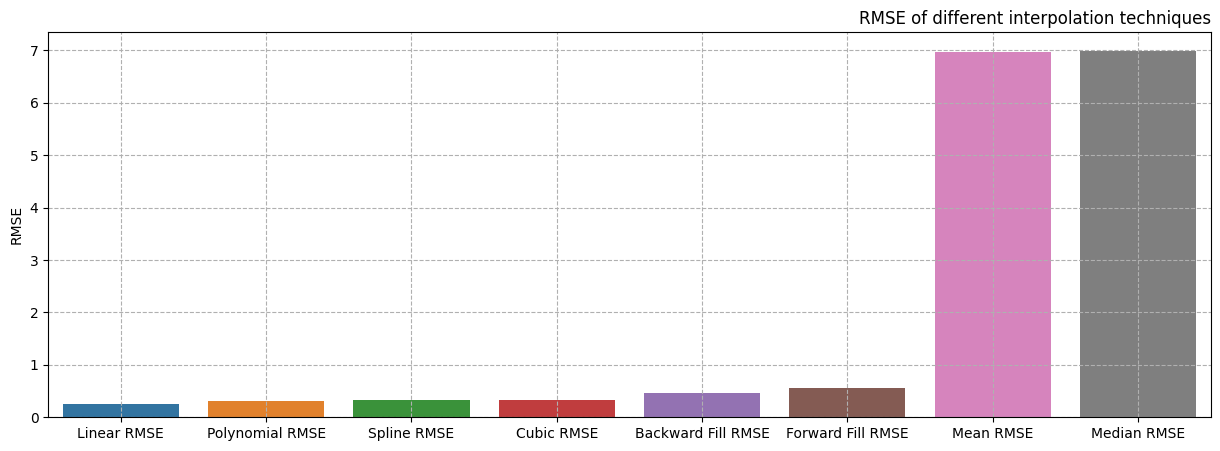

In [182]:
plt.figure(figsize=(15,5))
axis = plt.subplot(111)
sns.barplot(x=results_df.index, y=results_df['RMSE'])
plt.title("RMSE of different interpolation techniques", loc="right")
plt.grid(linestyle='dashed')
plt.show()

### Interpolation when Seasonality or Exponential Trends are present